In [196]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [197]:
#Read in the csv file and convert to a Pandas dataframe
data_players=pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [198]:
data_players.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [ ]:
# to display all the columns
pd.set_option("display.max_columns", None) 
data_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
# player:the player on a specific platform.
# team: The name of the team the player.
# name: The full name of the player.
# position: The player's position on the field 
# height: The player's height in centimeters.
# age: The player's age in years at the time of data collection.
# appearance: The number of matches the player has participated in.
# goals: The total number of goals scored by the player.
# assists: The total number of assists made by the player.
# yellow cards: The number of yellow cards received by the player.
# red cards: The number of red cards received by the player.
# goals conceded:The number of goals conceded while the player was on the field.
# clean sheets: The number of matches where the player's team did not concede any goals.
# minutes played: The total number of minutes the player has played in matches.
# days_injured: The total number of days the player was unavailable due to injuries.
# games_injured: The number of games the player missed due to injuries.
# award: The number of awards or recognitions the player has received.
# current_value: The player's market value at the time of data collection, typically in euros.
# highest_value: The highest recorded market value of the player in their career, typically in euros.
# position_encoded: A numerical encoding representing the player's position for modeling purposes.
# winger: A binary indicator (0 or 1) denoting whether the player is a winger.

data_players.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [201]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [202]:
data_players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [284]:
# Data from kaggle (Reliabe)

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# the data is up to date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# droup player
data_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [204]:
#no duplicat
data_players.duplicated().sum()

np.int64(0)

In [205]:
data_players.duplicated('player').sum()

np.int64(0)

In [206]:
data_players.duplicated('name').sum()

np.int64(170)

In [207]:
data_players[data_players.duplicated(['name'], keep=False)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
27,/antony/profil/spieler/602105,Manchester United,Antony,Attack-RightWinger,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,0.000000,0.00000,0.000000,5906,196,22,5,70000000,75000000,4,1
54,/danny-ward/profil/spieler/203026,Leicester City,Danny Ward,Goalkeeper,191.0,29.0,33,0.000000,0.000000,0.000000,0.000000,0.000000,1.69697,0.242424,2970,127,29,2,8000000,10000000,1,0
121,/joao-moutinho/profil/spieler/29364,Wolverhampton Wanderers,João Moutinho,midfield-CentralMidfield,170.0,36.0,75,0.034091,0.051136,0.119318,0.000000,0.000000,0.00000,0.000000,5280,146,24,16,2000000,30000000,3,0
123,/chiquinho/profil/spieler/695454,Wolverhampton Wanderers,Chiquinho,Attack-LeftWinger,179.0,23.0,32,0.223048,0.557621,0.334572,0.000000,0.000000,0.00000,0.000000,1614,327,44,2,2500000,3000000,4,1
126,/adama-traore/profil/spieler/204103,Wolverhampton Wanderers,Adama Traoré,Attack-RightWinger,178.0,27.0,80,0.095541,0.143312,0.071656,0.000000,0.000000,0.00000,0.000000,3768,200,25,2,12000000,40000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10263,/luke-daniels/profil/spieler/1037729,Cape Town City FC,Luke Daniels,Attack Centre-Forward,187.0,19.0,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,212,0,0,0,200000,200000,4,0
10721,/bernardo/profil/spieler/883217,Adelaide United,Bernardo,Attack-RightWinger,171.0,19.0,26,0.228814,0.228814,0.228814,0.000000,0.000000,0.00000,0.000000,1180,0,0,0,200000,200000,4,1
10729,/marcelo/profil/spieler/52920,Western Sydney Wanderers,Marcelo,Defender Centre-Back,191.0,36.0,47,0.091347,0.022837,0.251205,0.000000,0.045674,0.00000,0.000000,3941,26,2,5,800000,9000000,2,0
10731,/rhys-williams/profil/spieler/82474,Western Sydney Wanderers,Rhys Williams,Defender Centre-Back,187.0,34.0,6,0.000000,0.000000,0.681818,0.000000,0.000000,0.00000,0.000000,528,1307,146,0,150000,2000000,2,0


In [208]:
specific_name = 'João Moutinho'

duplicated_specific_name = data_players[data_players['name'] == specific_name]

duplicates = duplicated_specific_name[duplicated_specific_name.duplicated(['name'], keep=False)]

duplicates


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
121,/joao-moutinho/profil/spieler/29364,Wolverhampton Wanderers,João Moutinho,midfield-CentralMidfield,170.0,36.0,75,0.034091,0.051136,0.119318,0.0,0.0,0.0,0.0,5280,146,24,16,2000000,30000000,3,0
1842,/joao-moutinho/profil/spieler/461906,Spezia Calcio,João Moutinho,Defender Left-Back,191.0,25.0,5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,145,440,52,1,1500000,1500000,2,1


In [ ]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [209]:
#Display number missing values per column
data_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [210]:
#no nulls
data_players.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [ ]:
# go to clean them 


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [211]:
data_players.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [212]:
# check columns types 
data_players.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [213]:
data_players= data_players.drop(columns=['player'])

In [214]:
data_players.head(1)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [215]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['name', 'position','team']

In [ ]:
data_players['goals']

0        0.000000
1        0.000000
2        0.000000
3        0.028090
4        0.017889
           ...   
10749    0.175953
10750    0.372671
10751    0.375000
10752    0.312139
10753    0.000000
Name: goals, Length: 10754, dtype: float64

In [217]:
# Find the largest goal value
largest_goal = data_players['goals'].max()
largest_goal


np.float64(11.25)

In [ ]:
data_players.head(3)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


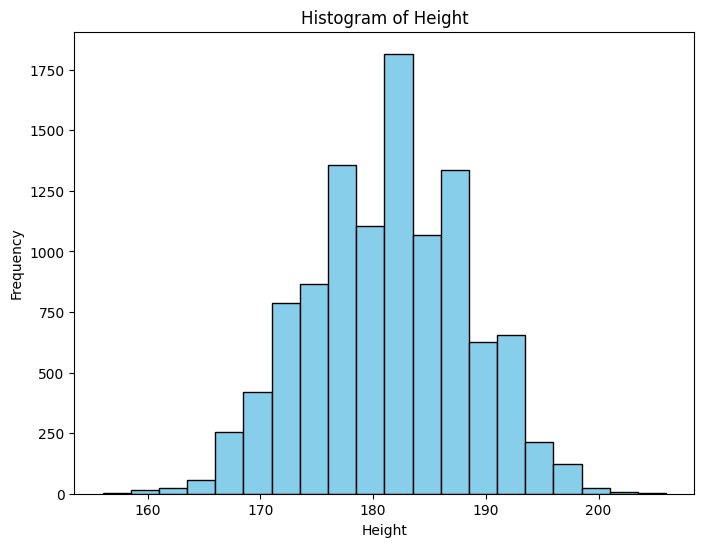

In [ ]:
# check outliers + clean them + Dealing with outliers:

# 'height'
#>160 &<200
plt.figure(figsize=(8, 6))
plt.hist(data_players['height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Q1 = data_players['height'].quantile(0.25) 
Q3 = data_players['height'].quantile(0.75)  
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_players = data_players[(data_players['height'] >= lower_bound) & (data_players['height'] <= upper_bound)]


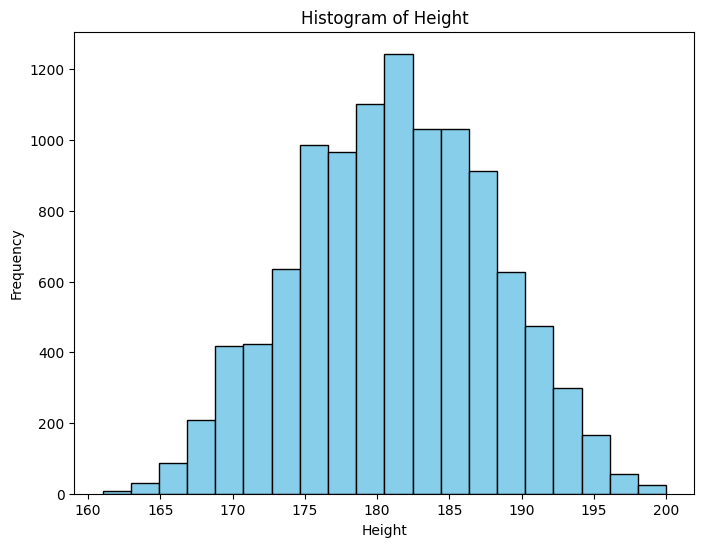

In [221]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


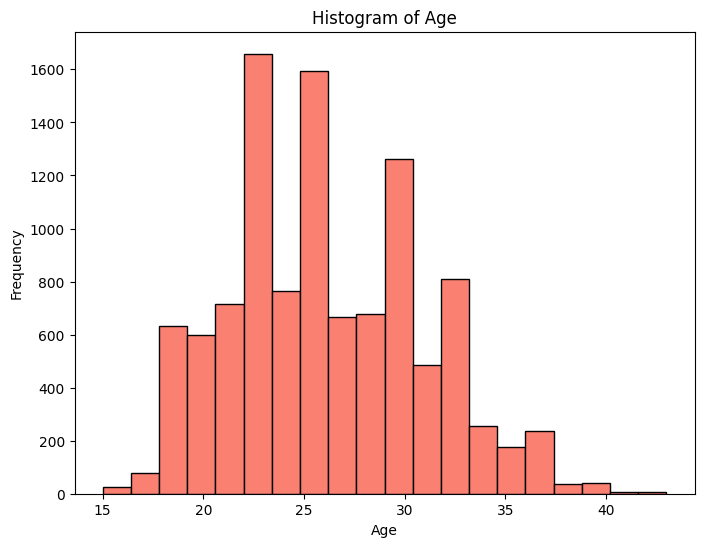

In [ ]:
# 'age'
plt.figure(figsize=(8, 6))
plt.hist(data_players['age'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:

Q1 = data_players['age'].quantile(0.25) 
Q3 = data_players['age'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_players = data_players[(data_players['age'] >= lower_bound) & (data_players['age'] <= upper_bound)]

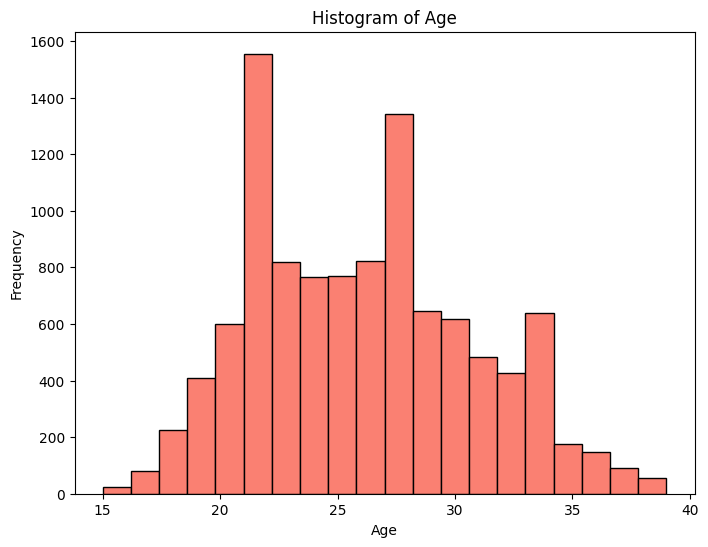

In [224]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['age'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

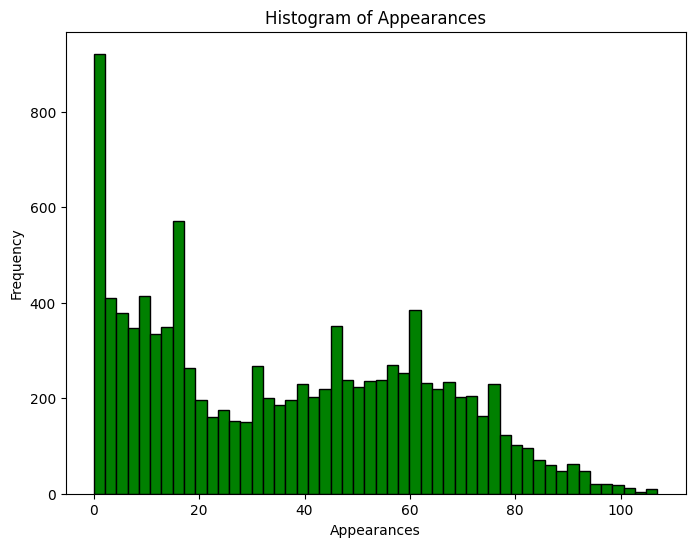

In [ ]:
# 'appearance'
plt.figure(figsize=(8, 6))
plt.hist(data_players['appearance'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Appearances')
plt.xlabel('Appearances')
plt.ylabel('Frequency')
plt.show()


In [ ]:

Q1 = data_players['appearance'].quantile(0.25)  
Q3 = data_players['appearance'].quantile(0.75)  
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_players = data_players[(data_players['appearance'] >= lower_bound) & (data_players['appearance'] <= upper_bound)]

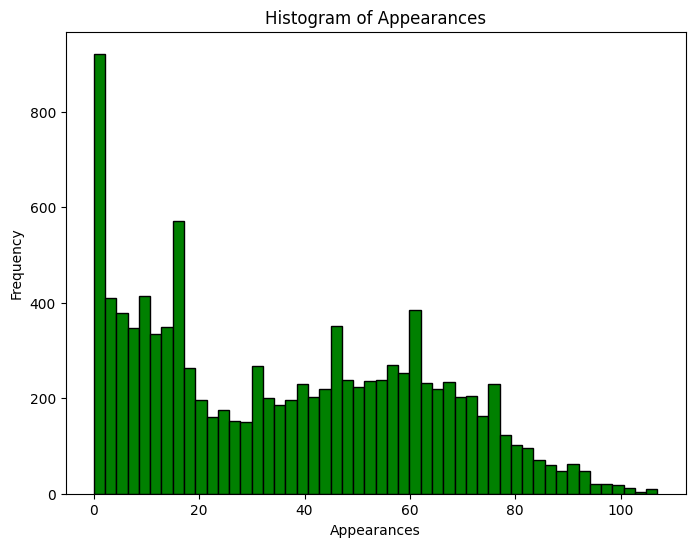

In [227]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['appearance'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Appearances')
plt.xlabel('Appearances')
plt.ylabel('Frequency')
plt.show()

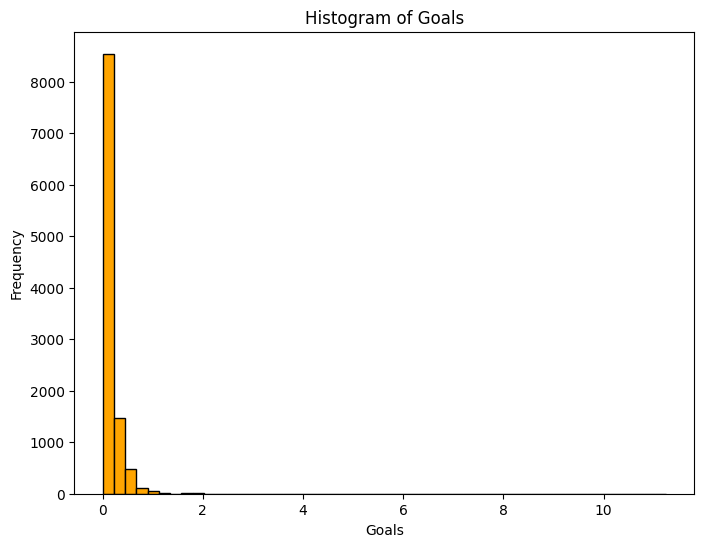

In [ ]:
# 'goals'
plt.figure(figsize=(8, 6))
plt.hist(data_players['goals'], bins=50, color='orange', edgecolor='black')
plt.title('Histogram of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


In [229]:
data_players.shape

(10695, 21)

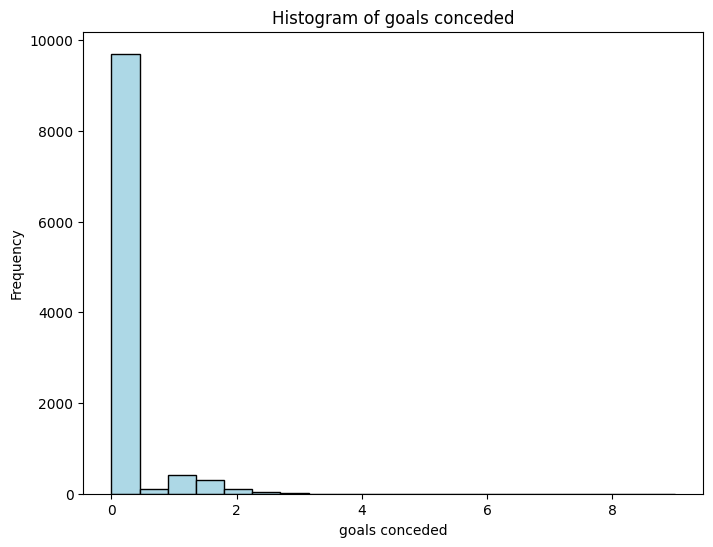

In [231]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['goals conceded'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of goals conceded')
plt.xlabel('goals conceded')
plt.ylabel('Frequency')
plt.show()

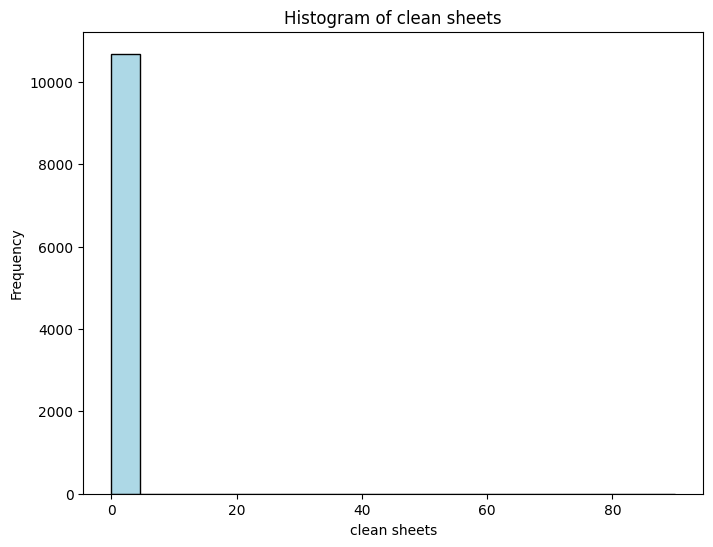

In [232]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['clean sheets'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of clean sheets')
plt.xlabel('clean sheets')
plt.ylabel('Frequency')
plt.show()

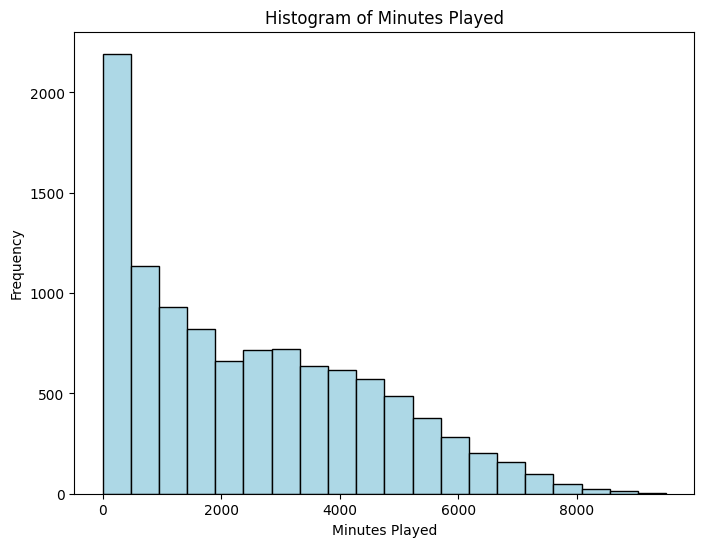

In [ ]:
# 'minutes_played'
#remove from 80000
plt.figure(figsize=(8, 6))
plt.hist(data_players['minutes played'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()


In [ ]:
data_players = data_players[data_players['minutes played']<=8000]

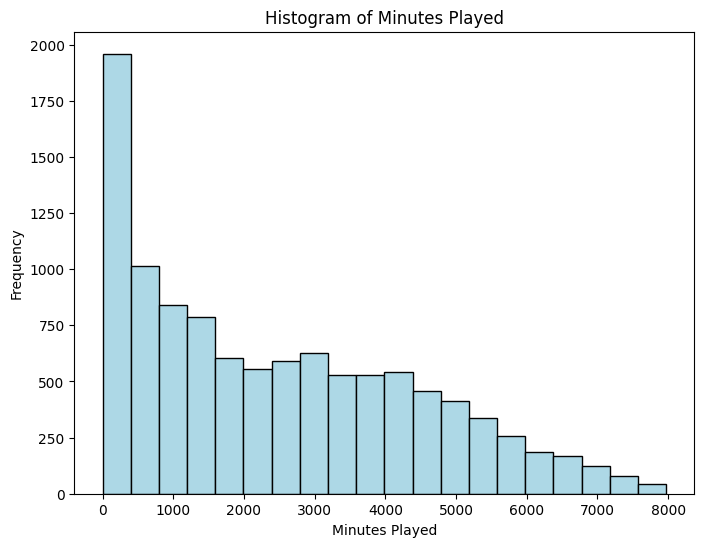

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['minutes played'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_players.shape

(10645, 21)

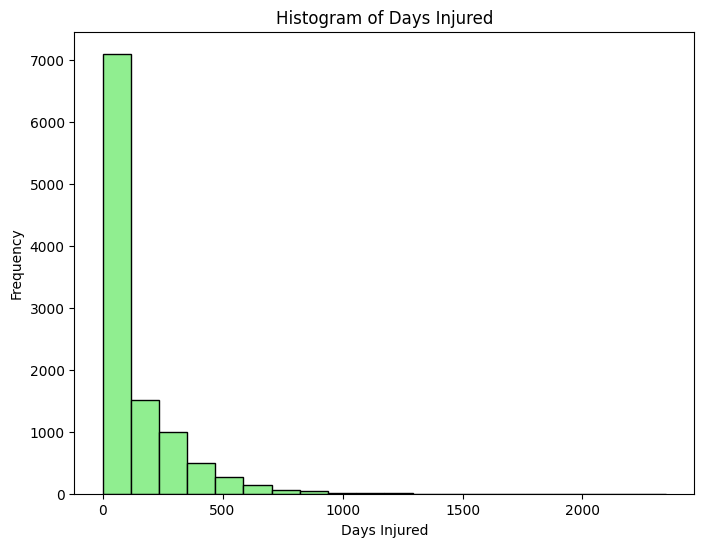

In [ ]:
#'days_injured'
#remove 500+
plt.figure(figsize=(8, 6))
plt.hist(data_players['days_injured'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_players = data_players[(data_players['days_injured']<=500) ]

In [239]:
data_players.shape

(10175, 21)

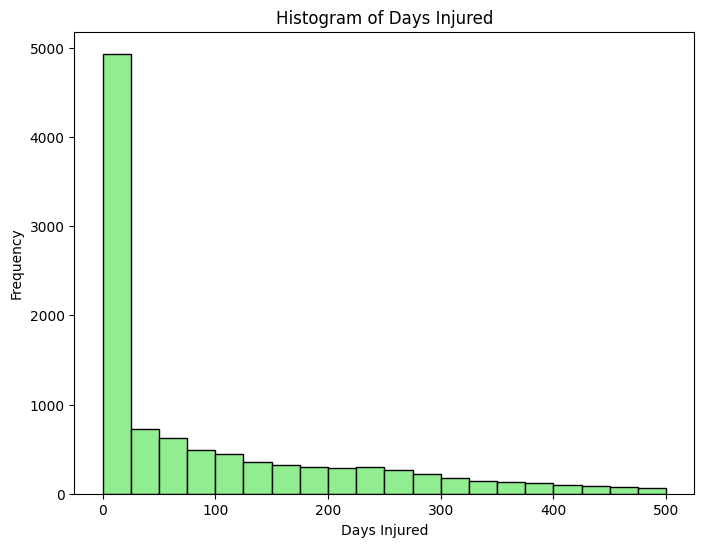

In [240]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['days_injured'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Frequency')
plt.show()

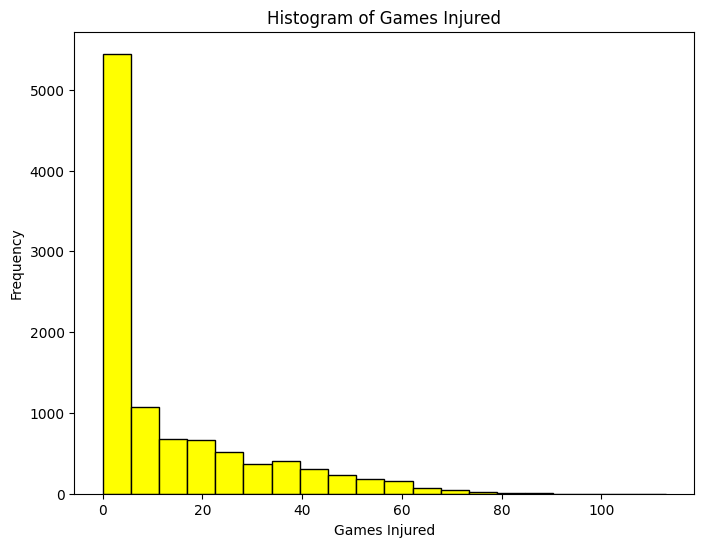

In [ ]:
#'games_injured'
#remove 80++
plt.figure(figsize=(8, 6))
plt.hist(data_players['games_injured'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Games Injured')
plt.xlabel('Games Injured')
plt.ylabel('Frequency')
plt.show()


In [242]:
data_players = data_players[(data_players['days_injured']<=80) ]

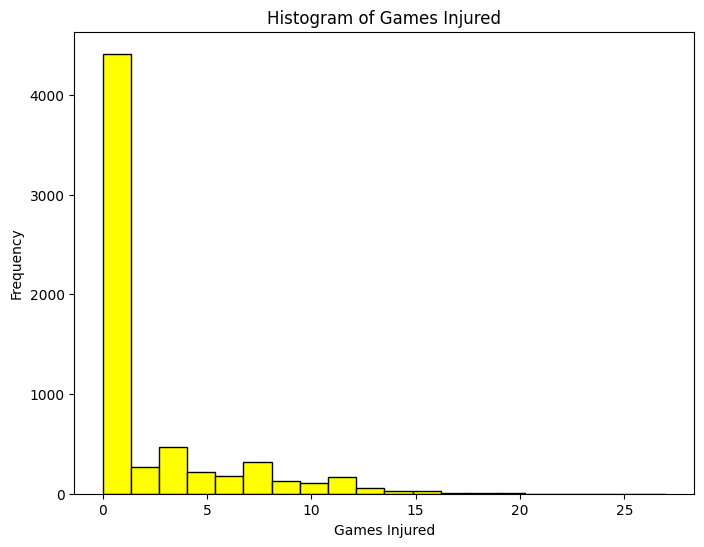

In [243]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['games_injured'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Games Injured')
plt.xlabel('Games Injured')
plt.ylabel('Frequency')
plt.show()

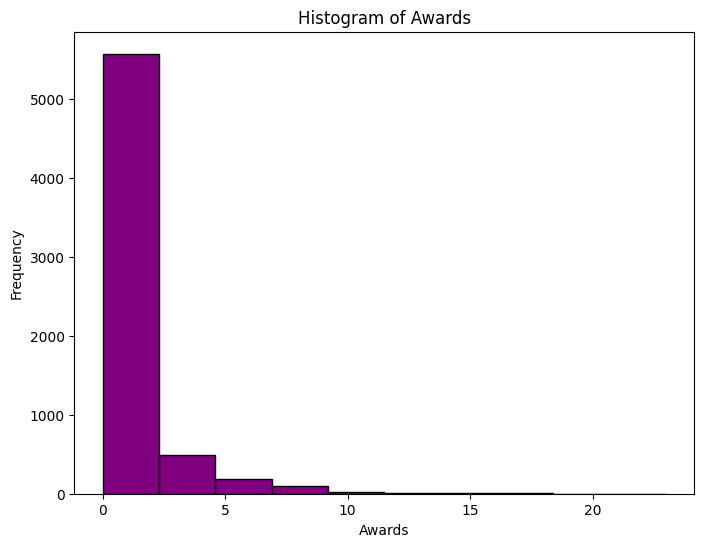

In [ ]:
# 'award'
plt.figure(figsize=(8, 6))
plt.hist(data_players['award'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Awards')
plt.xlabel('Awards')
plt.ylabel('Frequency')
plt.show()
#30++

In [245]:
data_players.shape

(6400, 21)

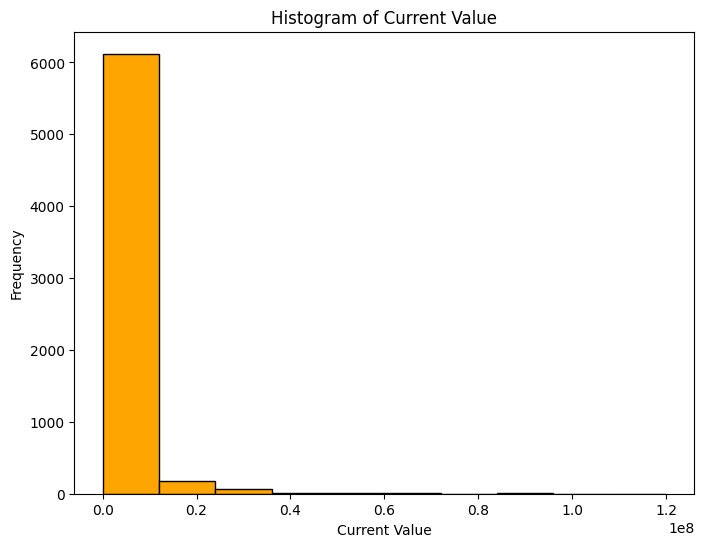

In [ ]:
# 'current_value'
plt.figure(figsize=(8, 6))
plt.hist(data_players['current_value'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Current Value')
plt.xlabel('Current Value')
plt.ylabel('Frequency')
plt.show()
#0,40

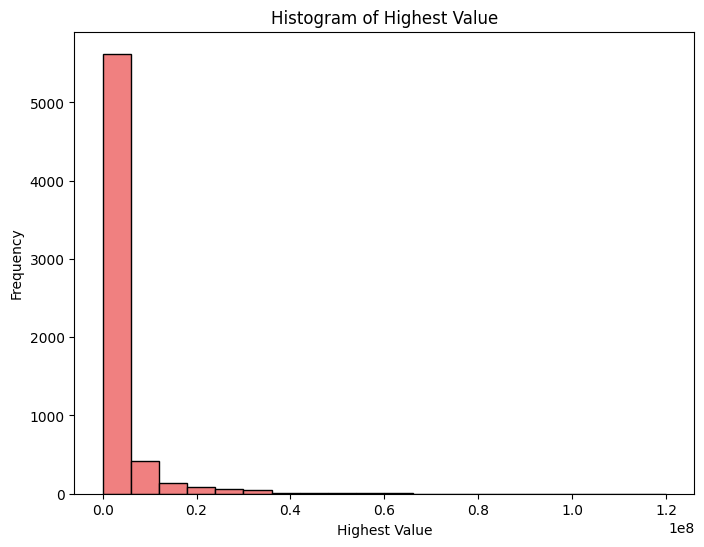

In [ ]:
# 'highest_value'
plt.figure(figsize=(8, 6))
plt.hist(data_players['highest_value'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Highest Value')
plt.xlabel('Highest Value')
plt.ylabel('Frequency')
plt.show()


In [248]:
data_players['current_value'].max()

np.int64(120000000)

## Feature engineering

In [249]:
categorical_features

['name', 'position', 'team']

In [250]:
data_players = pd.get_dummies(data_players, columns=categorical_features)

In [251]:
data_players.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,name_AJ Marcucci,name_Aaron Boupendza,name_Aaron Calver,name_Aaron Gurd,name_Aaron McEneff,name_Aaron Ramsdale,name_Aaron Ramsey,name_Aaron Zehnter,name_Aarón Herrera,name_Aarón Martín,name_Aarón Quirós,name_Abde Ezzalzouli,name_Abdelmounaim Boutouil,name_Abdi Banda,name_Abdi Salim,name_Abdou Harroui,name_Abdoulaye Bamba,name_Abdoulaye Cissoko,name_Abdoullah Ba,name_Abdul Mumin,name_Abdulaziz Al Bishi,name_Abdulaziz Al-Alawi,name_Abdulaziz Al-Aryani,name_Abdulaziz Al-Bishi,name_Abdulaziz Al-Harabi,name_Abdulaziz Al-Jamman,name_Abdulaziz Al-Shahrani,name_Abdulaziz Majrashi,name_Abdulaziz Makeen,name_Abdulaziz Noor,name_Abdulbasit Hawswi,name_Abdulelah Al-Amri,name_Abdulelah Al-Bukhari,name_Abdulelah Al-Malki,name_Abdulelah Al-Shammeri,name_Abdulellah Al-Shehri,name_Abdulkareem Ali Al-Muziel,name_Abdulkareem Maghrabi,name_Abdulkarim Al-Qahtani,name_Abdulkarim Sultan,name_Abdullah Al-Ammar,name_Abdullah Al-Burayh,name_Abdullah Al-Fahad,name_Abdullah Al-Hamdan,name_Abdullah Al-Harbi,name_Abdullah Al-Hawsawi,name_Abdullah Al-Jadani,name_Abdullah Al-Jawaey,name_Abdullah Al-Khaibari,name_Abdullah Al-Mayouf,name_Abdullah Al-Oaisher,name_Abdullah Al-Saleh,name_Abdullah Al-Salem,name_Abdullah Al-Samti,name_Abdullah Al-Shamekh,name_Abdullah Al-Shammari,name_Abdullah Al-Shanqiti,name_Abdullah Al-Yousef,name_Abdullah Al-Zoari,name_Abdullah Hassoun,name_Abdullah Khateeb,name_Abdullah Madu,name_Abdullah Mohammed Hakami,name_Abdullah Nahar,name_Abdullah Radif,name_Abdullah Saeed,name_Abdullah Yahya Maghrahi,name_Abdulmajeed Al-Sulaiheem,name_Abdulmalik Al-Shammari,name_Abdulmohsin Fallatah,name_Abdulqaddous Attieh,name_Abdulrahman Al-Alawi,name_Abdulrahman Al-Barakah,name_Abdulrahman Al-Dhafeeri,name_Abdulrahman Al-Hajri,name_Abdulrahman Al-Hurayb,name_Abdulrahman Al-Obaid,name_Abdulrahman Al-Oboud,name_Abdulrahman Al-Safari,name_Abdulrahman Anwar,name_Abdulrahman Ghareeb,name_Abdulrahmen Al-Mughais,name_Abdulsalam Ibrahim,name_Abdulwahab Jafar,name_Abdón Prats,name_Abdülkerim Bardakci,name_Abednego Mosiatlhaga,name_Abel Mabaso,name_Abiel Osorio,name_Abner,name_Abraham Rodriguez,name_Abraham Romero,name_Abram Ngcobo,name_Abubakar Inalkaev,name_Adalberto Carrasquilla,name_Adam Armstrong,name_Adam Bareiro,name_Adam Grinwis,name_Adam Jakubech,name_Adam Le Fondre,name_Adam Lundqvist,name_Adam Maher,name_Adam Pavlesic,name_Adam Reach,name_Adam Stejskal,name_Adam Wharton,name_Adam Zimarino,name_Ademir,name_Aden McCarthy,name_Aderlan,name_Aderllan Santos,name_Adi Mehremic,name_Adil Aouchiche,name_Adil Demirbag,name_Adil Taoui,name_Adilson Malanda,name_Adis Jasic,name_Adisu Bayew,name_Admiral Muskwe,name_Ado Onaiwu,name_Adolfo Gaich,name_Adonis Frías,name_Adrian Segecic,name_Adriano Firmino,name_Adriel,name_Adrien Tamèze,name_Adrien Thomasson,name_Adrián,name_Adrián Aldrete,name_Adrián Butzke,name_Adrián Martínez,name_Adrián Mora,name_Adrián Spörle,name_Adrián Sánchez,name_Adryelson,name_Adyson,name_Agostino Spina,name_Agustin Baldi,name_Agustín Alonso,name_Agustín Bolívar,name_Agustín Cardozo,name_Agustín Dattola,name_Agustín Fontana,name_Agustín Giay,name_Agustín Lagos,name_Agustín Martegani,name_Agustín Mulet,name_Agustín Oliveros,name_Agustín Palavecino,name_Agustín Rossi,name_Agustín Sant'Anna,name_Agustín Sández,name_Agustín Toledo,name_Agustín Urzi,name_Ahmad Al-Harbi,name_Ahmad Al-Hbeab,name_Ahmad Al-Zaein,name_Ahmad Taleb,name_Ahmed Abdu,name_Ahmed Al-Ghamdi,name_Ahmed Al-Jubaya,name_Ahmed Al-Sultan,name_Ahmed Bamsaud,name_Ahmed Hamdi,name_Ahmed Longmire,name_Ahmed Musa,name_Ahmed Sharahili,name_Ahmed Yousef Fallatah,name_Ahmet Kagan Malatyali,name_Ahmet Kivanc,name_Aidan Simmons,name_Aiden McFadden,name_Aidomo Emakhu,name_Aimar Oroz,name_Aimé Mabika,name_Aitor Paredes,name_Aitor Ruibal,name_Ajak Deu,name_Ajani Fortune,name_Akil Watts,na

In [252]:
data_players.shape

(6400, 6738)

## Feature selection

In [ ]:
correlation= data_players.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value           1.000000
highest_value           0.931191
appearance              0.387807
minutes played          0.384967
name_Jude Bellingham    0.238467
                          ...   
position_Attack        -0.032565
position_midfield      -0.038875
age                    -0.054246
goals conceded         -0.060078
position_Goalkeeper    -0.081698
Name: current_value, Length: 6738, dtype: float64


In [ ]:
threshold = 0.1 
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'name_Aurélien Tchouaméni', 'name_Bruno Guimarães', 'name_Bukayo Saka',
       'name_Dejan Kulusevski', 'name_Eduardo Camavinga',
       'name_Enzo Fernández', 'name_Gavi', 'name_Jamal Musiala',
       'name_Jonathan David', 'name_Josko Gvardiol', 'name_Jude Bellingham',
       'name_Jules Koundé', 'name_Moisés Caicedo', 'name_Mykhaylo Mudryk',
       'name_Randal Kolo Muani', 'name_Victor Osimhen', 'team_Arsenal FC',
       'team_Aston Villa', 'team_Bayern Munich',
       'team_Brighton &amp; Hove Albion', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Newcastle United', 'team_Real Madrid',
       'team_SSC Napoli'],
      dtype='object')

In [257]:
selected_features=['appearance', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'name_Aurélien Tchouaméni', 'name_Bruno Guimarães', 'name_Bukayo Saka',
       'name_Dejan Kulusevski', 'name_Eduardo Camavinga',
       'name_Enzo Fernández', 'name_Gavi', 'name_Jamal Musiala',
       'name_Jonathan David', 'name_Josko Gvardiol', 'name_Jude Bellingham',
       'name_Jules Koundé', 'name_Moisés Caicedo', 'name_Mykhaylo Mudryk',
       'name_Randal Kolo Muani', 'name_Victor Osimhen', 'team_Arsenal FC',
       'team_Aston Villa', 'team_Bayern Munich',
       'team_Brighton &amp; Hove Albion', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Newcastle United', 'team_Real Madrid',
       'team_SSC Napoli']

In [258]:
data_players = data_players[selected_features]
data_players.head()

,appearance,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,name_Aurélien Tchouaméni,name_Bruno Guimarães,name_Bukayo Saka,name_Dejan Kulusevski,name_Eduardo Camavinga,name_Enzo Fernández,name_Gavi,name_Jamal Musiala,name_Jonathan David,name_Josko Gvardiol,name_Jude Bellingham,name_Jules Koundé,name_Moisés Caicedo,name_Mykhaylo Mudryk,name_Randal Kolo Muani,name_Victor Osimhen,team_Arsenal FC,team_Aston Villa,team_Bayern Munich,team_Brighton &amp; Hove Albion,team_Chelsea FC,team_FC Barcelona,team_Newcastle United,team_Real Madrid,team_SSC Napoli
8,34,0.000000,2758,47,13,0,2000000,2000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16,55,0.313667,4017,0,0,10,25000000,100000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,92,0.221811,4869,45,10,11,20000000,50000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,39,0.064562,2788,0,0,1,800000,800000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21,51,0.102506,3512,0,0,1,800000,800000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [259]:
data_players.shape

(6400, 33)

## prepare train and test data

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [261]:
X = data_players.drop(['current_value'], axis=1)
y = data_players['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [262]:
X.shape

(6400, 32)

## Buliding the model

In [263]:
# Buliding the model
model = LinearRegression()

In [264]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the model

In [265]:
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [266]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [267]:
coeff_df

,Coefficient
appearance,-1.883015e+05
assists,3.445884e+04
minutes played,5.452031e+05
days_injured,1.701521e+05
games_injured,-2.103549e+05
award,-4.024101e+05
highest_value,4.765838e+06
name_Aurélien Tchouaméni,-2.328306e-10
name_Bruno Guimarães,1.629242e+05
name_Bukayo Saka,-2.328306e-10


In [268]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 2170323.2421875


## Evaluating the Model 

### Mean Absolute Error

In [269]:
y_base = [y_train.mean()] * len(y_test)

In [270]:
y_base

[np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float6

In [271]:
#MAE
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')


Mean Absolute  Error of base model: 2.953968e+06


In [272]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 7.991885e+05
Mean Absolute Error for testing: 9.304256e+05


### Mean Square Error

In [273]:
#MSE
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.431661e+13


In [274]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 3.849640e+12
Mean Squared Error for testing: 6.165069e+12


### Root Mean Squared Error

In [275]:
#RMSE
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.369980e+06


In [276]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 1.962050e+06
Root Mean Squared Error for testing: 2.482956e+06


### R Square

In [277]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.8869382552685179
R Square for testing: 0.8860467874938596


### Predictions vs. Real Values

In [278]:
predictions = model.predict(X_test_scaled)

In [279]:
predictions

array([ 3705901.83794855,  1915623.63006588,   125773.70374638, ...,
         210298.99544054, 52824951.07888135,   276101.50952137])

In [280]:
Real_Values = np.array(y_test)

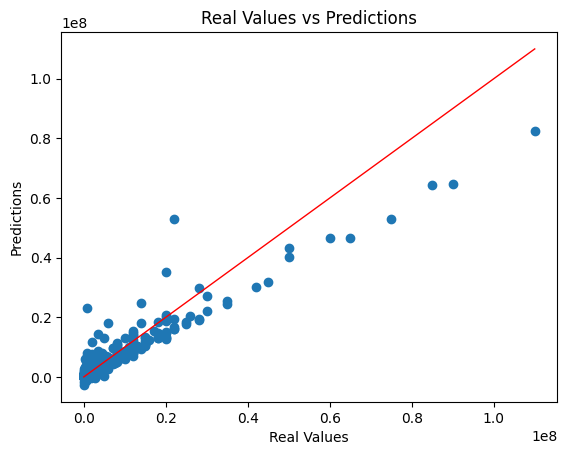

In [281]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

/var/folders/0p/gw35_vxx0vg7lky7mxpy0crh0000gn/T/ipykernel_23643/1819318845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


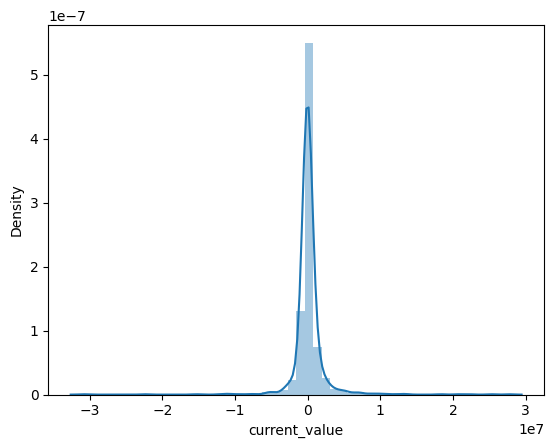

In [283]:
sns.distplot((y_test-predictions),bins=50); 